<a href="https://colab.research.google.com/github/Arashjamehbozorg/House-Prices-Advanced-Regression-Techniques/blob/main/five_model_combined_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor


In [69]:
train_data = pd.read_csv("train.csv", index_col = 0)

In [70]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [71]:
numerical_cols = train_data.select_dtypes(include = np.number).columns
numerical_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [72]:
train_data[numerical_cols] = train_data[numerical_cols].fillna(-1)

In [73]:
categorical_columns = train_data.select_dtypes(include = "object").columns
train_data[categorical_columns] = train_data[categorical_columns].fillna("missing")

In [74]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,Inside,...,0,missing,missing,missing,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,FR2,...,0,missing,missing,missing,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,Inside,...,0,missing,missing,missing,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,Corner,...,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,FR2,...,0,missing,missing,missing,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,missing,Reg,Lvl,AllPub,Inside,...,0,missing,missing,missing,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,missing,Reg,Lvl,AllPub,Inside,...,0,missing,MnPrv,missing,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,missing,Reg,Lvl,AllPub,Inside,...,0,missing,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [75]:
train_data = pd.get_dummies(train_data, columns=categorical_columns)

In [76]:
train_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=304)

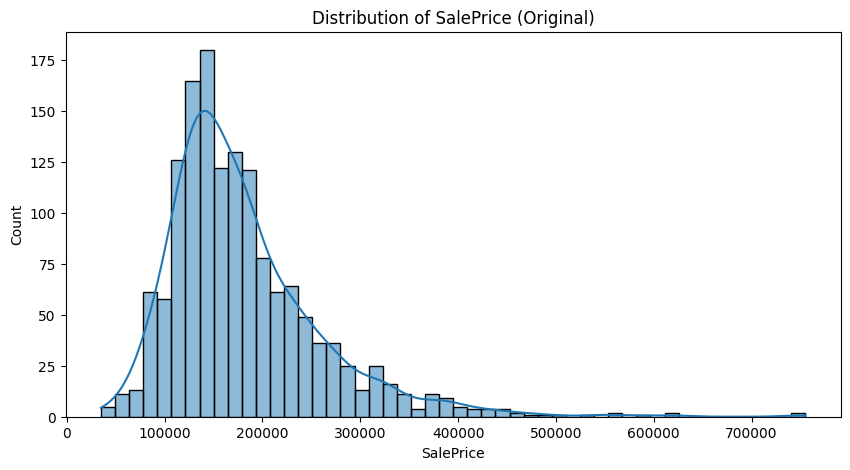

In [77]:
plt.figure(figsize=(10,5))
sns.histplot(train_data["SalePrice"], bins=50, kde=True)
plt.title("Distribution of SalePrice (Original)")
plt.show()


In [78]:
# train test split
X = train_data.drop("SalePrice", axis = 1)
y = np.log1p(train_data["SalePrice"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X
y

,SalePrice
Id,
1,12.247699
2,12.109016
3,12.317171
4,11.849405
5,12.429220
...,...
1456,12.072547
1457,12.254868
1458,12.493133


In [79]:
# the skew value is more than 1
y.skew()

np.float64(0.12134661989685333)

In [80]:
lasso_pipe = Pipeline([
    ("scalar", StandardScaler(with_mean=False)),
    ("lasso", LassoCV(cv=5, random_state= 42, max_iter = 5000))
])
lasso_pipe.fit(X_train, y_train)
best_alpha = lasso_pipe.named_steps["lasso"].alpha_
print("Best alpha chosen:", best_alpha)

Best alpha chosen: 0.007287381445479384


In [81]:
# Get the coefficients from the trained Lasso model
lasso_coefficients = lasso_pipe.named_steps["lasso"].coef_

# Create a pandas Series of coefficients with feature names as index
feature_importance = pd.Series(lasso_coefficients, index=X_train.columns)

# Select features with non-zero coefficients (most important features)
important_features = feature_importance[feature_importance != 0].sort_values(ascending=False)

print("Most important features (non-zero coefficients):")
display(important_features)

Most important features (non-zero coefficients):


,0
GrLivArea,0.128607
OverallQual,0.088239
YearBuilt,0.042331
TotalBsmtSF,0.035991
OverallCond,0.031173
...,...
SaleCondition_Abnorml,-0.009839
CentralAir_N,-0.013384
MSZoning_RM,-0.020654
Condition2_PosN,-0.026933


In [82]:
X_train_selected = X_train[important_features.index]
X_test_selected = X_test[important_features.index]
X_train_selected

,GrLivArea,OverallQual,YearBuilt,TotalBsmtSF,OverallCond,GarageCars,YearRemodAdd,GarageArea,BsmtFinSF1,Fireplaces,...,FireplaceQu_missing,Functional_Maj2,Heating_Grav,BsmtCond_Fa,MSZoning_C (all),SaleCondition_Abnorml,CentralAir_N,MSZoning_RM,Condition2_PosN,RoofMatl_ClyTile
Id,,,,,,,,,,,,,,,,,,,,,
255,1314,5,1957,1314,6,1,1957,294,922,0,...,True,False,False,False,False,False,False,False,False,False
1067,1571,6,1993,799,7,2,1994,380,0,1,...,False,False,False,False,False,False,False,False,False,False
639,796,5,1910,796,7,0,1950,0,0,0,...,True,False,False,False,False,False,False,False,False,False
800,1768,5,1937,731,7,1,1950,240,569,2,...,False,False,False,False,False,False,False,False,False,False
381,1691,5,1924,1026,6,1,1950,308,218,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1314,6,2006,1314,5,2,2006,440,24,1,...,False,False,False,False,False,False,False,False,False,False
1131,1981,4,1928,1122,3,2,1950,576,622,2,...,False,False,False,False,False,False,False,False,False,False
1295,864,5,1955,864,7,2,1990,572,167,0,...,True,False,False,False,False,False,False,False,False,False


In [83]:
ridge = Ridge(alpha=10)
krr   = KernelRidge(alpha=1.0, kernel="rbf")
rf    = RandomForestRegressor(n_estimators=300, random_state=42)
gbr   = GradientBoostingRegressor(n_estimators=300, random_state=42)
knn   = KNeighborsRegressor(n_neighbors=5)

In [84]:
stacked = StackingRegressor(
    estimators=[
        ("ridge", ridge),
        ("krr",   krr),
        ("rf",    rf),
        ("gbr",   gbr),
        ("knn",   knn)
    ],
    final_estimator=Ridge(alpha=5),
    cv=5
)

In [85]:
model = stacked
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 0.1274224439563713


In [86]:
# Inverse transform the predicted and actual values
y_pred_original_scale = np.expm1(y_pred)
y_test_original_scale = np.expm1(y_test)

# Calculate RMSE on the original scale
rmse_original_scale = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))

print("Validation RMSE on original scale:", rmse_original_scale)

Validation RMSE on original scale: 25751.008705679604


# Task
Load the data from "test.csv", preprocess it, select the important features, make predictions using the trained stacked model, inverse transform the predictions, and prepare a submission file.

## Load the test data

### Subtask:
Load the data from "test.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from "test.csv" into a pandas DataFrame and set the 'Id' column as the index.



In [87]:
test_data = pd.read_csv("test.csv", index_col = 0)

## Preprocess the test data

### Subtask:
Apply the same preprocessing steps as used for the training data, including handling missing values and one-hot encoding.


**Reasoning**:
Apply the same preprocessing steps to the test data, including handling missing values for both numerical and categorical columns, and then performing one-hot encoding.



In [88]:
numerical_cols_test = test_data.select_dtypes(include = np.number).columns
test_data[numerical_cols_test] = test_data[numerical_cols_test].fillna(-1)

categorical_columns_test = test_data.select_dtypes(include = "object").columns
test_data[categorical_columns_test] = test_data[categorical_columns_test].fillna("missing")

test_data = pd.get_dummies(test_data, columns=categorical_columns_test)

## Select important features

### Subtask:
Select only the features from the preprocessed test data that were identified as important during the training phase.


**Reasoning**:
Select the features from the preprocessed test data that are present in the important features identified during training.



In [89]:
# Align columns - add missing columns and remove extra ones
missing_cols = set(important_features.index) - set(test_data.columns)
for c in missing_cols:
    test_data[c] = 0

extra_cols = set(test_data.columns) - set(important_features.index)
test_data = test_data.drop(columns=extra_cols)

# Ensure the order of columns is the same as in X_train_selected
X_test_selected = test_data[important_features.index]
display(X_test_selected)

,GrLivArea,OverallQual,YearBuilt,TotalBsmtSF,OverallCond,GarageCars,YearRemodAdd,GarageArea,BsmtFinSF1,Fireplaces,...,FireplaceQu_missing,Functional_Maj2,Heating_Grav,BsmtCond_Fa,MSZoning_C (all),SaleCondition_Abnorml,CentralAir_N,MSZoning_RM,Condition2_PosN,RoofMatl_ClyTile
Id,,,,,,,,,,,,,,,,,,,,,
1461,896,5,1961,882.0,6,1.0,1961,730.0,468.0,0,...,True,False,False,False,False,False,False,False,False,0
1462,1329,6,1958,1329.0,6,1.0,1958,312.0,923.0,0,...,True,False,False,False,False,False,False,False,False,0
1463,1629,5,1997,928.0,5,2.0,1998,482.0,791.0,1,...,False,False,False,False,False,False,False,False,False,0
1464,1604,6,1998,926.0,6,2.0,1998,470.0,602.0,1,...,False,False,False,False,False,False,False,False,False,0
1465,1280,8,1992,1280.0,5,2.0,1992,506.0,263.0,0,...,True,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1092,4,1970,546.0,7,0.0,1970,0.0,0.0,0,...,True,False,False,False,False,False,False,True,False,0
2916,1092,4,1970,546.0,5,1.0,1970,286.0,252.0,0,...,True,False,False,False,False,True,False,True,False,0
2917,1224,5,1960,1224.0,7,2.0,1996,576.0,1224.0,1,...,False,False,False,False,False,True,False,False,False,0


**Reasoning**:
The error indicates that some features present in `important_features.index` are not in `test_data`. This is likely due to differences in categorical values between the training and test sets after one-hot encoding. We need to align the columns by adding missing columns to the test set and removing extra columns.



In [90]:
# Align columns - add missing columns and remove extra ones
missing_cols = set(important_features.index) - set(test_data.columns)
for c in missing_cols:
    test_data[c] = 0

extra_cols = set(test_data.columns) - set(important_features.index)
test_data = test_data.drop(columns=extra_cols)

# Ensure the order of columns is the same as in X_train_selected
X_test_selected = test_data[important_features.index]
display(X_test_selected)

,GrLivArea,OverallQual,YearBuilt,TotalBsmtSF,OverallCond,GarageCars,YearRemodAdd,GarageArea,BsmtFinSF1,Fireplaces,...,FireplaceQu_missing,Functional_Maj2,Heating_Grav,BsmtCond_Fa,MSZoning_C (all),SaleCondition_Abnorml,CentralAir_N,MSZoning_RM,Condition2_PosN,RoofMatl_ClyTile
Id,,,,,,,,,,,,,,,,,,,,,
1461,896,5,1961,882.0,6,1.0,1961,730.0,468.0,0,...,True,False,False,False,False,False,False,False,False,0
1462,1329,6,1958,1329.0,6,1.0,1958,312.0,923.0,0,...,True,False,False,False,False,False,False,False,False,0
1463,1629,5,1997,928.0,5,2.0,1998,482.0,791.0,1,...,False,False,False,False,False,False,False,False,False,0
1464,1604,6,1998,926.0,6,2.0,1998,470.0,602.0,1,...,False,False,False,False,False,False,False,False,False,0
1465,1280,8,1992,1280.0,5,2.0,1992,506.0,263.0,0,...,True,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1092,4,1970,546.0,7,0.0,1970,0.0,0.0,0,...,True,False,False,False,False,False,False,True,False,0
2916,1092,4,1970,546.0,5,1.0,1970,286.0,252.0,0,...,True,False,False,False,False,True,False,True,False,0
2917,1224,5,1960,1224.0,7,2.0,1996,576.0,1224.0,1,...,False,False,False,False,False,True,False,False,False,0


## Make predictions

### Subtask:
Use the trained stacked model to make predictions on the preprocessed test data.


**Reasoning**:
Use the trained stacked model to make predictions on the preprocessed test data.



In [91]:
predictions = model.predict(X_test_selected)

## Inverse transform predictions

### Subtask:
Apply the inverse transformation (`np.expm1`) to the predicted values to get them back to the original sale price scale.


**Reasoning**:
Inverse transform the predicted values to the original scale using np.expm1.



In [92]:
predictions_original_scale = np.expm1(predictions)

## Prepare submission file

### Subtask:
Create a submission file in the specified format (typically with 'Id' and 'SalePrice' columns).


**Reasoning**:
Create a pandas DataFrame with 'Id' and 'SalePrice' columns, populate them with the respective data, and save it as a CSV file for submission.



In [93]:
submission_df = pd.DataFrame({'Id': X_test_selected.index, 'SalePrice': predictions_original_scale})
submission_df.to_csv('submission_five_model_v1.csv', index=False)
display(submission_df.head())

,Id,SalePrice
0,1461,122770.318080
1,1462,156858.178255
2,1463,176383.200968
3,1464,190121.846291
4,1465,192564.599081
